In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_excel('Data Refresh Sample Data.xlsx')
df.head()

,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name
0,Regular Air,-213.2500,38.94,35.00,Muhammed MacIntyre
1,Delivery Truck,457.8100,208.16,68.02,Barry French
2,Regular Air,46.7075,8.69,2.99,Barry French
3,Regular Air,1198.9710,195.99,3.99,Clay Rozendal
4,Regular Air,-4.7150,5.28,2.99,Claudia Miner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
Ship Mode        22 non-null object
Profit           22 non-null float64
Unit Price       22 non-null float64
Shipping Cost    22 non-null float64
Customer Name    22 non-null object
dtypes: float64(3), object(2)
memory usage: 960.0+ bytes


In [4]:
# Thankfully no missing values

df.isnull().sum()

Ship Mode        0
Profit           0
Unit Price       0
Shipping Cost    0
Customer Name    0
dtype: int64

In [6]:
# Only a handfull of data... should be easy-peacy

df.shape

(22, 5)

In [7]:
df['Ship Mode']

0        Regular Air
1     Delivery Truck
2        Regular Air
3        Regular Air
4        Regular Air
5        Regular Air
6        Regular Air
7     Delivery Truck
8        Regular Air
9        Regular Air
10       Regular Air
11       Express Air
12       Regular Air
13       Regular Air
14       Regular Air
15       Regular Air
16       Regular Air
17    Delivery Truck
18       Regular Air
19    Delivery Truck
20       Regular Air
21    Delivery Truck
Name: Ship Mode, dtype: object

In [8]:
# Dropping the customer name column which isn't relevant in the analysis

df2 = df.drop('Customer Name', axis = 1)

In [9]:
df2

,Ship Mode,Profit,Unit Price,Shipping Cost
0,Regular Air,-213.2500,38.94,35.00
1,Delivery Truck,457.8100,208.16,68.02
2,Regular Air,46.7075,8.69,2.99
3,Regular Air,1198.9710,195.99,3.99
4,Regular Air,-4.7150,5.28,2.99
5,Regular Air,782.9100,39.89,3.04
6,Regular Air,93.8000,15.74,1.39
7,Delivery Truck,440.7200,100.98,26.22
8,Regular Air,-481.0410,100.98,69.00
9,Regular Air,-11.6820,65.99,5.26


In [16]:
df2.groupby('Ship Mode')['Ship Mode'].agg('count')

Ship Mode
Delivery Truck     5
Express Air        1
Regular Air       16
Name: Ship Mode, dtype: int64

seems like about 72% of the shipping modes have been made through Regular Air... whatever that is

In [17]:
df2.groupby('Ship Mode').mean()

,Profit,Unit Price,Shipping Cost
Ship Mode,,,
Delivery Truck,527.436000,205.410000,44.9180
Express Air,26.920000,3.690000,0.5000
Regular Air,96.448219,75.111875,10.4325


Interesting because despite having 72% of shipping done through Regular Air while Delivery Truck only having just 22%, Delivery Truck has made more profit but could be due to one of these reasons;

<ol>
    <li>Delivery Truck has more average Unit price of goods (205.41) than Regular air (75.11)</li>
    <li>Also Delivery Truck has more expensive shipping cost (44.91) which could directly inflate their profit compared to Regular Air (10.43)</li>
    <li>And lastly from the raw data Regular Air has more negative values in their profits which could be debts and lead to a fall in their profits</li>
<ol>

In [18]:
df2.groupby('Ship Mode').median()

,Profit,Unit Price,Shipping Cost
Ship Mode,,,
Delivery Truck,440.7200,120.980,30.00
Express Air,26.9200,3.690,0.50
Regular Air,0.5225,27.465,4.46


Now if we look at the data from a median perspective we realize Regular Air actually made 0 profits while the least used mode (Express Air) made more profit than it

In [ ]:
# Now to visualize all the details

In [20]:
df2.columns

Index(['Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost'], dtype='object')

In [81]:
Delivery_Mean = df2.groupby('Ship Mode')['Profit'].agg('mean')[0]

In [82]:
Express_Mean = df2.groupby('Ship Mode')['Profit'].agg('mean')[1]

In [83]:
Regular_Mean = df2.groupby('Ship Mode')['Profit'].agg('mean')[2]

In [88]:
All_mean = [Delivery_Mean, Express_Mean, Regular_Mean]

In [89]:
All_name = ['Delivery Truck', 'Express Air', 'Regular Air']

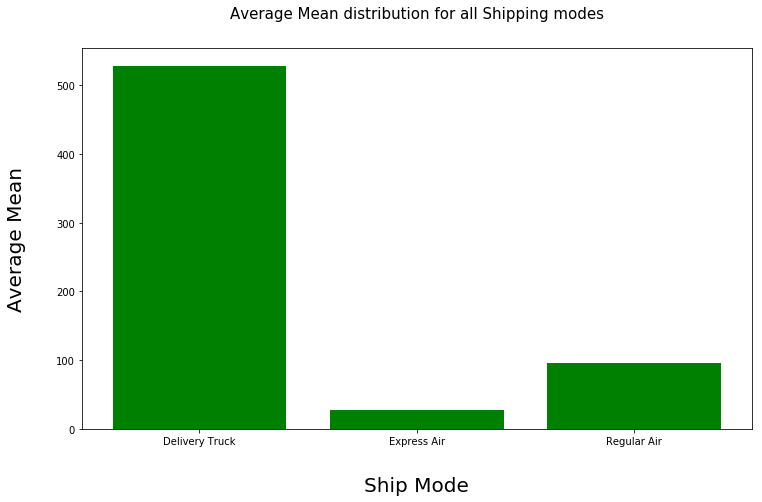

In [99]:
plt.title('Average Mean distribution for all Shipping modes', fontsize = 15, pad = 30)
plt.xlabel('Ship Mode', fontsize = 20, labelpad = 30)
plt.ylabel('Average Mean', fontsize = 20, labelpad = 30)
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(All_name, All_mean, color = 'green');
